In [16]:
import pandas as pd
import numpy as np
from numpy import loadtxt
from IPython.display import display
import networkx as nx
import matplotlib.pyplot as plt
import subprocess as sub
import matplotlib.pyplot as plt
from pathlib import Path
import random
import seaborn as sns
import os

In [2]:
# First networkx library is imported 
# along with matplotlib

  
# Defining a Class
class GraphVisualization:
   
    def __init__(self):
          
        # visual is a list which stores all 
        # the set of edges that constitutes a
        # graph
        self.visual = []
          
    # addEdge function inputs the vertices of an
    # edge and appends it to the visual list
    def addEdge(self, a, b):
        temp = [a, b]
        self.visual.append(temp)
          
    # In visualize function G is an object of
    # class Graph given by networkx G.add_edges_from(visual)
    # creates a graph with a given list
    # nx.draw_networkx(G) - plots the graph
    # plt.show() - displays the graph
    def visualize(self):
        G = nx.DiGraph()
        G.add_edges_from(self.visual)
        nx.draw_networkx(G)
        plt.show()
  
# Driver code
def drawGraph(test_input):
    G = GraphVisualization()
    for index, row in test_input.iterrows():
        G.addEdge(row["i"],row["j"])
    G.visualize()

In [3]:
class Test:
    def __init__(self, test):
        self.test = str(test)[6:-4]
        
        self.filepath_input = str(test)
        self.cant_pags = int(pd.read_csv(self.filepath_input, header=None)[0][0])
        self.cant_links = int(pd.read_csv(self.filepath_input, header=None)[0][1])
        self.test_input = pd.read_csv(self.filepath_input, header=None, skiprows=2, sep=' ', names=["i", "j"])
    
    def postprocesar(self):
        self.filepath_output_exp = self.filepath_input + ".own.out"
        self.p_exp = pd.read_csv(self.filepath_output_exp, header=None)[0][0]
        self.test_output_exp = np.genfromtxt(self.filepath_output_exp, delimiter=' ')
    
    def imprimir(self):
        print("Este es el test para: ", self.test)
        print("cantidad de páginas: ", self.cant_pags, "cantidad de links: ", self.cant_links, "valor de p nuestro: ", self.p_exp)
        #print("test input: ")
        #display(self.test_input)
        print("test output experimentacion: ", self.test_output_exp[1:])
        drawGraph(self.test_input)
        

In [4]:
def compilar():
    result = sub.run("g++ -o tp1 -O3 main.cpp model/LILMatrix.cpp", shell=True, capture_output=True)
    print("stdout:", result.stdout)

In [5]:
# creador de tests de garra
for n in range(2, 21):
    with open(f'tests/test_la_garra_{n}.txt', 'w') as f:
        f.write(f"{n}\n")
        #print("n:",n)
        enlaces = n-1
        f.write(f"{enlaces}\n")
        #print("enlaces:", enlaces)
        for i in range(2,n):
            f.write(f"{i} 1\n")
            #print(i, 1)
        f.write(f"1 {n}")
        #print(1, n)

In [6]:
def correrUnTest(un_test, un_p):
    test_obj = Test(un_test)
    test_obj.p_exp = un_p
    print("Ejecutando: ", "./tp1 {} {}".format(test_obj.filepath_input,test_obj.p_exp))
    result = sub.run("./tp1 {} {}".format(test_obj.filepath_input,test_obj.p_exp), shell=True, capture_output=True)
    test_obj.postprocesar()
    return(test_obj)
    print("stdout:", result.stdout)

In [7]:
compilar()

stdout: b''


In [8]:
# Leo todos los tests
#Info: https://www.pythonlikeyoumeanit.com/Module5_OddsAndEnds/WorkingWithFiles.html
root = Path(".")
tests = list((root / "tests").glob("test_*.txt"))

[PosixPath('tests/test_4_ownpage_6link_4links.txt'),
 PosixPath('tests/test_la_garra_16.txt'),
 PosixPath('tests/test_la_garra_15.txt'),
 PosixPath('tests/test_la_garra_7.txt'),
 PosixPath('tests/test_4_ownpage_6link.txt'),
 PosixPath('tests/test_3_ownpage_5link.txt'),
 PosixPath('tests/test_4_ownpage_6link_6links.txt'),
 PosixPath('tests/test_la_garra_14.txt'),
 PosixPath('tests/test_3_base.txt'),
 PosixPath('tests/test_la_garra_19.txt'),
 PosixPath('tests/test_3_ownpage_4link.txt'),
 PosixPath('tests/test_3_ownpage_6link.txt'),
 PosixPath('tests/test_la_garra_3.txt'),
 PosixPath('tests/test_la_garra_5.txt'),
 PosixPath('tests/test_la_garra_11.txt'),
 PosixPath('tests/test_3_ownpage_1link.txt'),
 PosixPath('tests/test_4_ownpage_6link_2links.txt'),
 PosixPath('tests/test_3_ownpage_2link.txt'),
 PosixPath('tests/test_la_garra_6.txt'),
 PosixPath('tests/test_la_garra_17.txt'),
 PosixPath('tests/test_la_garra_20.txt'),
 PosixPath('tests/test_la_garra_2.txt'),
 PosixPath('tests/test_la_gar

Ejecutando:  ./tp1 tests/test_estrella_invertida_10.txt 0.0
Ejecutando:  ./tp1 tests/test_estrella_invertida_10.txt 0.2
Ejecutando:  ./tp1 tests/test_estrella_invertida_10.txt 0.4
Ejecutando:  ./tp1 tests/test_estrella_invertida_10.txt 0.6000000000000001
Ejecutando:  ./tp1 tests/test_estrella_invertida_10.txt 0.8
Ejecutando:  ./tp1 tests/test_estrella_invertida_10.txt 1.0


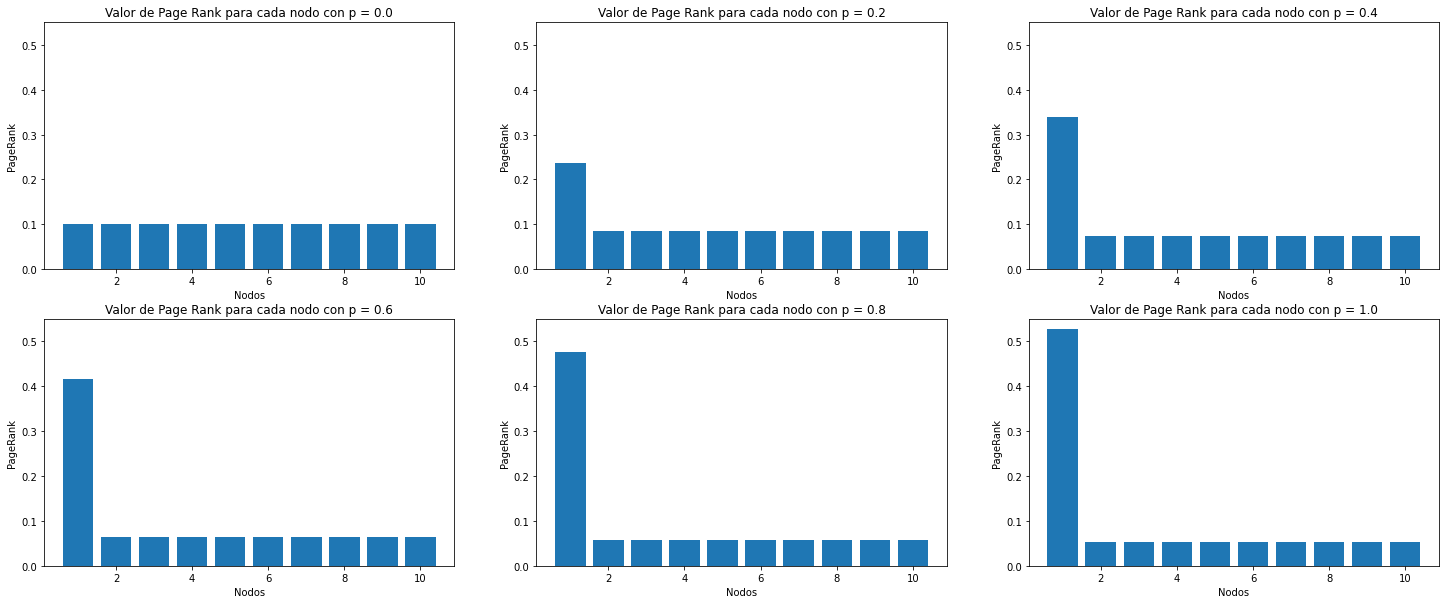

In [9]:
# Test 1: fijo la cantidad de nodos, corro test de estrella para distintos valores de p

testpath = "tests/test_estrella_invertida_10.txt"
resultados = []

for p in np.arange(0, 1.1, 0.2):
    #print(testpath)
    #print(str(test)[6:-4])
    res = correrUnTest(testpath, p)
    #res.imprimir()
    resultados.append(res)

plt.figure(figsize=(25, 10))

for i in enumerate(resultados):
    test = i[1]
    if test.test == "test_estrella_invertida_10":     
        #print(f"El test es {test.test} con p {test.p_exp}")
        #print(f"El output es {test.test_output_exp[1:]}.")

        nodos = np.arange(1, test.cant_pags+1)
       
        plt.subplot(2,3,i[0]+1)
        plt.bar(nodos,test.test_output_exp[1:])
        plt.ylim(0, 0.55)
        plt.xlabel('Nodos')
        plt.ylabel('PageRank')
        plt.title(f'Valor de Page Rank para cada nodo con p = {test.p_exp}')

plt.show()

Ejecutando:  ./tp1 tests/test_la_garra_3.txt 0.6
Ejecutando:  ./tp1 tests/test_la_garra_6.txt 0.6
Ejecutando:  ./tp1 tests/test_la_garra_9.txt 0.6
Ejecutando:  ./tp1 tests/test_la_garra_12.txt 0.6
Ejecutando:  ./tp1 tests/test_la_garra_15.txt 0.6
Ejecutando:  ./tp1 tests/test_la_garra_18.txt 0.6


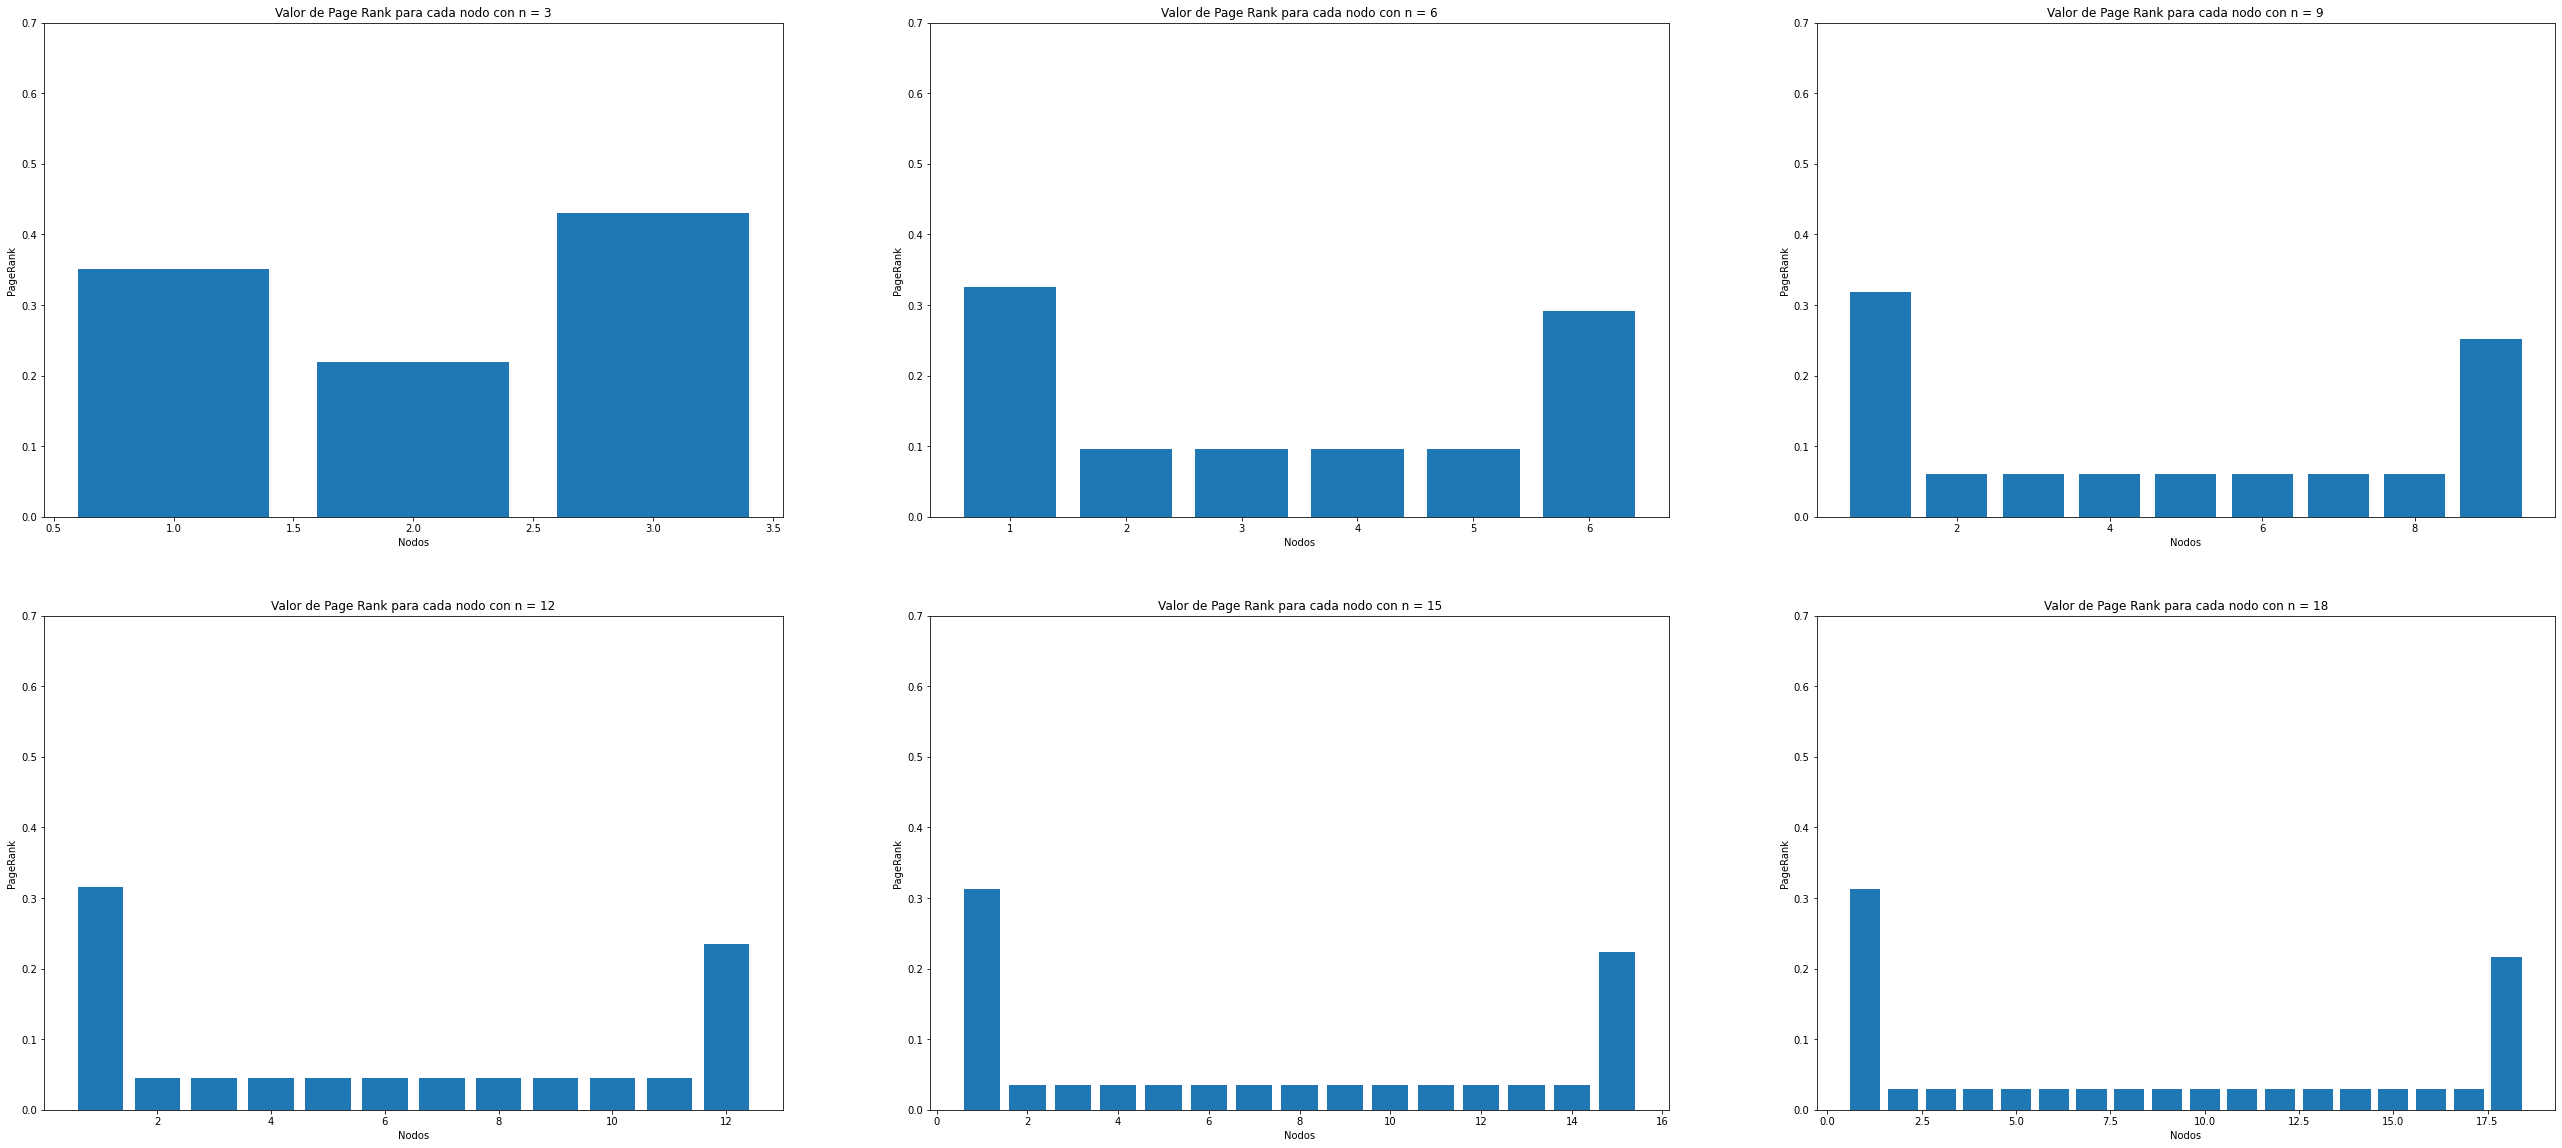

In [10]:
# Test 2: corro test de la garra variando el n y con p fijo

p = 0.6
resultados = []

for n in range(3,21, 3):
    res = correrUnTest(f"tests/test_la_garra_{n}.txt", p)
    #res.imprimir()
    resultados.append(res)

    
plt.figure(figsize=(45, 20))

for i in enumerate(resultados):
    test = i[1]   
    #print(f"El test es {test.test} con p {test.p_exp}")
    #print(f"El output es {test.test_output_exp[1:]}.")

    nodos = np.arange(1, test.cant_pags+1)
       
    plt.subplot(2,3,i[0]+1)
    plt.bar(nodos,test.test_output_exp[1:])
    plt.ylim(0, 0.7)
    plt.xlabel('Nodos')
    plt.ylabel('PageRank')
    plt.title(f'Valor de Page Rank para cada nodo con n = {test.cant_pags}')

plt.show()

Ejecutando:  ./tp1 tests/test_3_base.txt 0.6
Este es el test para:  test_3_base
cantidad de páginas:  11 cantidad de links:  18 valor de p nuestro:  0.6
test output experimentacion:  [0.206462  0.1052    0.101616  0.162586  0.109295  0.0511935 0.0588726
 0.0511935 0.0511935 0.0511935 0.0511935]


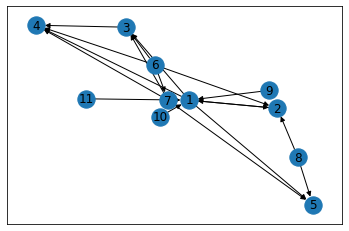

In [11]:
# test 3.0
res = correrUnTest(f"tests/test_3.0_base.txt", 0.6)
res.imprimir()

Ejecutando:  ./tp1 tests/test_3_ownpage_1link.txt 0.6
Este es el test para:  test_3_ownpage_1link
cantidad de páginas:  13 cantidad de links:  19 valor de p nuestro:  0.6
test output experimentacion:  [0.182209  0.0928423 0.0896797 0.143488  0.0964567 0.0451799 0.0519569
 0.0451799 0.0451799 0.0451799 0.0451799 0.0451799 0.0722879]


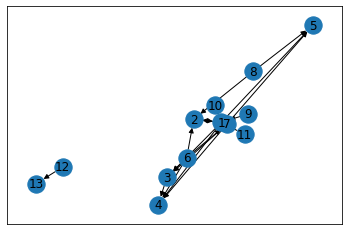

Ejecutando:  ./tp1 tests/test_3_ownpage_2link.txt 0.6
Este es el test para:  test_3_ownpage_2link
cantidad de páginas:  14 cantidad de links:  20 valor de p nuestro:  0.6
test output experimentacion:  [0.169926  0.0865834 0.083634  0.133814  0.0899541 0.0421342 0.0484543
 0.0421342 0.0421342 0.0421342 0.0421342 0.0421342 0.0421342 0.0926951]


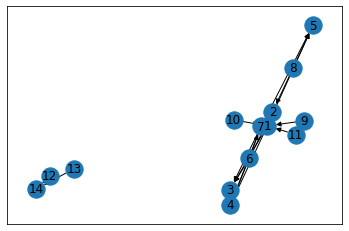

Ejecutando:  ./tp1 tests/test_3_ownpage_3link.txt 0.6
Este es el test para:  test_3_ownpage_3link
cantidad de páginas:  15 cantidad de links:  21 valor de p nuestro:  0.6
test output experimentacion:  [0.159194  0.081115  0.0783519 0.125363  0.0842729 0.0394731 0.0453941
 0.0394731 0.0394731 0.0394731 0.0394731 0.0394731 0.0394731 0.0394731
 0.110525 ]


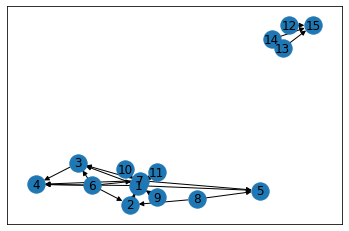

Ejecutando:  ./tp1 tests/test_3_ownpage_4link.txt 0.6
Este es el test para:  test_3_ownpage_4link
cantidad de páginas:  16 cantidad de links:  22 valor de p nuestro:  0.6
test output experimentacion:  [0.149737  0.0762964 0.0736974 0.117916  0.0792666 0.0371282 0.0426974
 0.0371282 0.0371282 0.0371282 0.0371282 0.0371282 0.0371282 0.0371282
 0.0371282 0.126236 ]


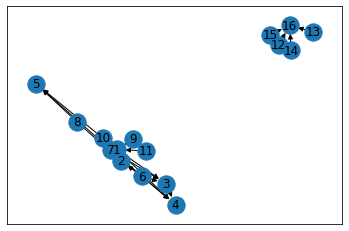

Ejecutando:  ./tp1 tests/test_3_ownpage_5link.txt 0.6
Este es el test para:  test_3_ownpage_5link
cantidad de páginas:  17 cantidad de links:  23 valor de p nuestro:  0.6
test output experimentacion:  [0.14134   0.0720181 0.0695649 0.111304  0.0748218 0.0350463 0.0403032
 0.0350463 0.0350463 0.0350463 0.0350463 0.0350463 0.0350463 0.0350463
 0.0350463 0.0350463 0.140185 ]


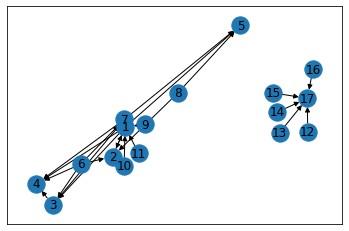

Ejecutando:  ./tp1 tests/test_3_ownpage_6link.txt 0.6
Este es el test para:  test_3_ownpage_6link
cantidad de páginas:  18 cantidad de links:  24 valor de p nuestro:  0.6
test output experimentacion:  [0.133836  0.0681942 0.0658712 0.105394  0.0708491 0.0331854 0.0381632
 0.0331854 0.0331854 0.0331854 0.0331854 0.0331854 0.0331854 0.0331854
 0.0331854 0.0331854 0.0331854 0.152653 ]


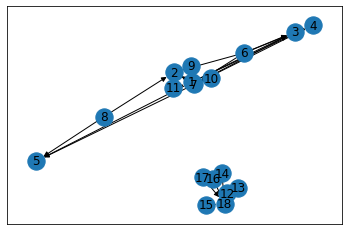

In [12]:
# test 3.1
for n in range(1,7):
    res = correrUnTest(f"tests/test_3.1_ownpage_{n}link.txt", p)
    res.imprimir()
    #resultados.append(res)

Ejecutando:  ./tp1 tests/test_4_ownpage_6link_2links.txt 0.6
Este es el test para:  test_4_ownpage_6link_2links
cantidad de páginas:  18 cantidad de links:  26 valor de p nuestro:  0.6
test output experimentacion:  [0.132022  0.06727   0.0649785 0.103966  0.0698889 0.0327357 0.037646
 0.0327357 0.0327357 0.0327357 0.0327357 0.0327357 0.0425564 0.0455026
 0.0327357 0.0327357 0.0327357 0.141549 ]


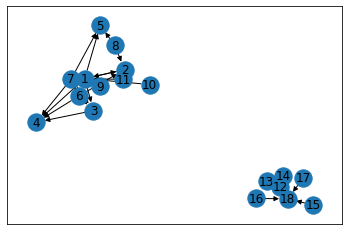

Ejecutando:  ./tp1 tests/test_4_ownpage_6link_4links.txt 0.6
Este es el test para:  test_4_ownpage_6link_4links
cantidad de páginas:  18 cantidad de links:  28 valor de p nuestro:  0.6
test output experimentacion:  [0.129874  0.0661755 0.0639213 0.102274  0.0687517 0.032203  0.0370335
 0.032203  0.032203  0.032203  0.032203  0.032203  0.0418639 0.0447622
 0.0456317 0.0458925 0.032203  0.128399 ]


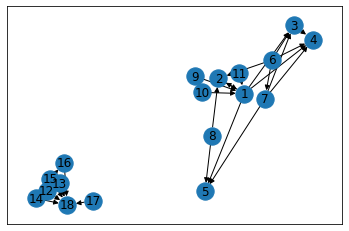

Ejecutando:  ./tp1 tests/test_4_ownpage_6link_6links.txt 0.6
Este es el test para:  test_4_ownpage_6link_6links
cantidad de páginas:  18 cantidad de links:  30 valor de p nuestro:  0.6
test output experimentacion:  [0.127317  0.0648727 0.0626629 0.100261  0.0673982 0.0315691 0.0363044
 0.0315691 0.0315691 0.0315691 0.0315691 0.0450987 0.0450987 0.0450987
 0.0450987 0.0450987 0.0450987 0.112747 ]


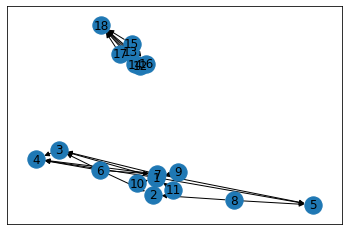

In [13]:
# test 3.2
for n in range(2,7, 2):
    res = correrUnTest(f"tests/test_3.2_ownpage_6link_{n}links.txt", p)
    res.imprimir()
    #resultados.append(res)

Ejecutando:  ./tp1 tests/test_3.3_ownpage_2link.txt 0.6
Este es el test para:  test_3.3_ownpage_2link
cantidad de páginas:  14 cantidad de links:  20 valor de p nuestro:  0.6
test output experimentacion:  [0.167387  0.0852897 0.0823844 0.131815  0.08861   0.0415046 0.0477303
 0.0415046 0.0415046 0.0415046 0.0415046 0.0415046 0.0664074 0.081349 ]


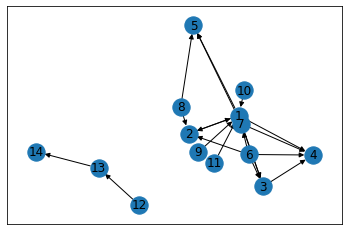

Ejecutando:  ./tp1 tests/test_3.3_ownpage_3link.txt 0.6
Este es el test para:  test_3.3_ownpage_3link
cantidad de páginas:  15 cantidad de links:  21 valor de p nuestro:  0.6
test output experimentacion:  [0.153522  0.0782249 0.0755602 0.120896  0.0812702 0.0380666 0.0437766
 0.0380666 0.0380666 0.0380666 0.0380666 0.0380666 0.0609066 0.0746106
 0.082833 ]


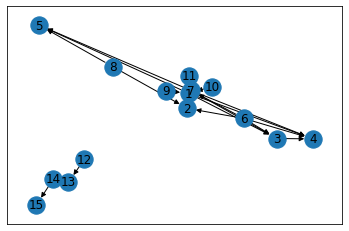

Ejecutando:  ./tp1 tests/test_3.3_ownpage_4link.txt 0.6
Este es el test para:  test_3.3_ownpage_4link
cantidad de páginas:  16 cantidad de links:  22 valor de p nuestro:  0.6
test output experimentacion:  [0.141135  0.0719133 0.0694636 0.111142  0.0747129 0.0349952 0.0402445
 0.0349952 0.0349952 0.0349952 0.0349952 0.0349952 0.0559924 0.0685907
 0.0761496 0.080685 ]


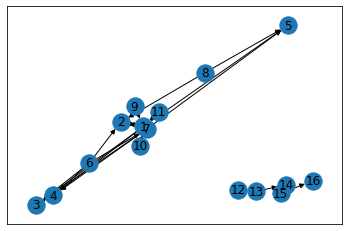

Ejecutando:  ./tp1 tests/test_3.3_ownpage_5link.txt 0.6
Este es el test para:  test_3.3_ownpage_5link
cantidad de páginas:  17 cantidad de links:  23 valor de p nuestro:  0.6
test output experimentacion:  [0.130269  0.066377  0.064116  0.102586  0.0689611 0.0323011 0.0371463
 0.0323011 0.0323011 0.0323011 0.0323011 0.0323011 0.0516818 0.0633102
 0.0702872 0.0744735 0.0769852]


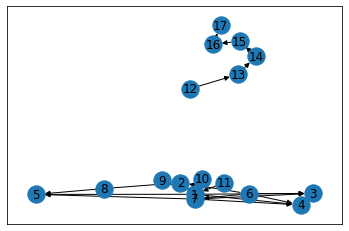

Ejecutando:  ./tp1 tests/test_3.3_ownpage_6link.txt 0.6
Este es el test para:  test_3.3_ownpage_6link
cantidad de páginas:  18 cantidad de links:  24 valor de p nuestro:  0.6
test output experimentacion:  [0.120788  0.0615461 0.0594496 0.0951194 0.0639422 0.0299503 0.0344428
 0.0299503 0.0299503 0.0299503 0.0299503 0.0299503 0.0479204 0.0587025
 0.0651718 0.0690533 0.0713823 0.0727796]


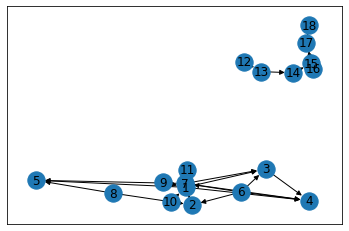

In [21]:
# test 3.3
# crear cadenas de nodos
for n in range(2,7):
    res = correrUnTest(f"tests/test_3.3_ownpage_{n}link.txt", p)
    res.imprimir()
    #resultados.append(res)

In [22]:
# Limpiador de outputs de tests, corra bajo su propio riesgo
root = Path(".")
os.system("rm -rf tests/*.txt.own.out")
os.system("rm -rf tests/test_la_garra_*.txt")
os.system("rm -rf tp1")

0